In [8]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# importing audio files
audio_1="audio/debussy.wav"
audio_2="audio/redhot.wav"
audio_3="audio/duke.wav"

# load audio files with librosa
track1, sr=librosa.load(audio_1)
track2, _ =librosa.load(audio_2)
track3, _=librosa.load(audio_3)

In [21]:
def rms(signal, frame_length, hop_length):
    rms=[]
    for i in range(0,len(signal),hop_length):
        rms_current_frame=np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length)
        rms.append(rms_current_frame)
    
    return np.array(rms)

In [28]:
# extract RMSE with librosa
FRAME_LENGTH=1024
HOP_LENGTH=512

rms_track1=rms(track1,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
rms_track2=rms(track2,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
rms_track3=rms(track3,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)

In [29]:
rms_track1.shape

(1292,)

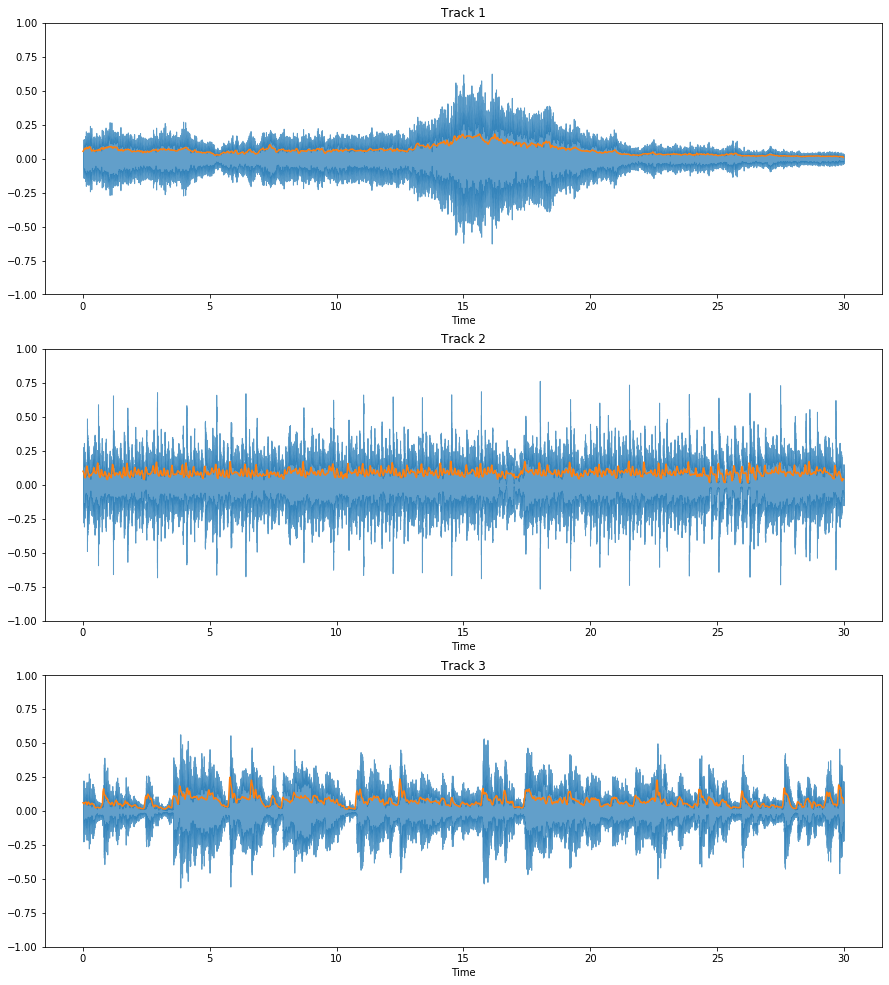

In [30]:
#plot the RMS for each track
frames=range(0,rms_track1.size)
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)


plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(track1,alpha=0.7)
plt.plot(t,rms_track1)
plt.title("Track 1")
plt.ylim(-1,1);

plt.subplot(3,1,2)
librosa.display.waveshow(track2,alpha=0.7)
plt.plot(t,rms_track2)
plt.title("Track 2")
plt.ylim(-1,1);

plt.subplot(3,1,3)
librosa.display.waveshow(track3,alpha=0.7)
plt.plot(t,rms_track3)
plt.title("Track 3")
plt.ylim(-1,1);

plt.show()